# QSAR fish toxicity Data Set

URL : https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

Number of Instances: 908

Attribute Characteristics: numeric

Number of Attributes: 7

Missing Values: No 


Attribute Information:

6 molecular descriptors and 1 quantitative experimental response:
    1. CIC0 - information indices
    2. SM1_Dz(Z) - 2D matrix-based descriptors
    3. GATS1i - 2D autocorrelations
    4. NdsCH - atom-type counts
    5. NdssC - atom-type counts
    6. MLOGP - molecular properties
    7. quantitative response, LC50 [-LOG(mol/L)]
The target variable is the **LC50**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
attrib = pd.read_csv('attributes.csv', delim_whitespace = True)
data = pd.read_csv('qsar_fish_toxicity.csv', sep=";", names = attrib['attributes'])

In [3]:
print("Data shape:", data.shape)
data.head()

Data shape: (908, 7)


,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
data.info()
#No nulls and all numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CIC0    908 non-null    float64
 1   SM1_Dz  908 non-null    float64
 2   GATS1i  908 non-null    float64
 3   NdsCH   908 non-null    int64  
 4   NdssC   908 non-null    int64  
 5   MLOGP   908 non-null    float64
 6   LC50    908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


We will remove the duplicate intance:


In [6]:
data = data.drop_duplicates()
data.shape

(907, 7)

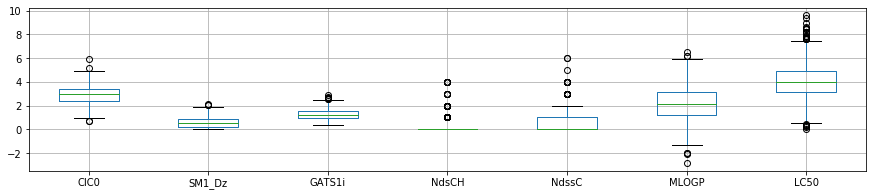

In [7]:
data2 = data
data2.boxplot(figsize=(15,3))

In [8]:
Z = np.abs(stats.zscore(data2))
Z

array([[0.47811089, 0.46790912, 0.96927691, ..., 0.59663817, 0.45825678,
        0.20246547],
       [0.93859817, 0.11324732, 1.09350108, ..., 0.56462968, 0.53152367,
        0.65242956],
       [1.02325679, 0.02212246, 1.17469283, ..., 0.56462968, 0.53152367,
        0.36665084],
       ...,
       [1.14347471, 0.67096378, 1.05544245, ..., 6.40297741, 0.56399082,
        0.51747706],
       [0.08936641, 1.78426346, 0.55053123, ..., 0.59663817, 0.8399424 ,
        0.86027413],
       [1.53237524, 0.94170332, 0.28158354, ..., 2.91917387, 1.84511478,
        2.84149004]])

In [9]:
data[(Z > 3).any(axis=1)]

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
18,3.024,0.452,2.698,0,0,1.107,0.450
38,2.918,0.223,0.944,3,0,2.066,4.590
61,2.126,0.405,0.917,4,2,0.411,6.380
84,5.926,0.134,1.671,0,0,6.203,4.628
122,2.366,0.405,2.606,0,0,-0.128,1.037
177,2.572,1.834,1.350,0,2,3.115,8.471
259,4.785,1.263,1.471,1,4,2.749,9.612
264,3.601,0.223,1.350,3,2,2.545,4.320
277,3.164,2.044,0.830,0,1,4.912,6.113
320,2.950,1.772,1.351,0,4,3.110,5.383


From the information above, it is probably okay to keep those values, it is not obvious that the information was incorrectly entered.

In [10]:
data.describe()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,LC50
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.898559,0.628521,1.293980,0.229327,0.486218,2.109735,4.064723
std,0.756394,0.428692,0.394346,0.605621,0.861603,1.433907,1.456475
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.346000,0.223000,0.951000,0.000000,0.000000,1.209000,3.151500
50%,2.937000,0.570000,1.244000,0.000000,0.000000,2.127000,3.991000
75%,3.407000,0.894500,1.562500,0.000000,1.000000,3.105000,4.909000
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


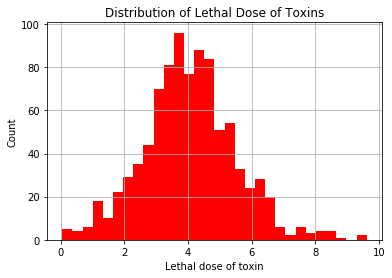

In [11]:
data.hist('LC50', bins = 30, color = 'red')
plt.xlabel('Lethal dose of toxin')
plt.ylabel('Count')
plt.title('Distribution of Lethal Dose of Toxins')
plt.show()


The distribution of the target variable is normal.

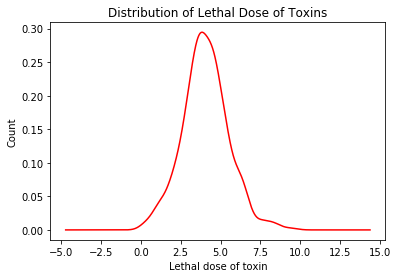

In [12]:
data["LC50"].plot.kde(color = 'red')
plt.xlabel('Lethal dose of toxin')
plt.ylabel('Count')
plt.title('Distribution of Lethal Dose of Toxins')
plt.show()

In [13]:
data.nunique()

CIC0      502
SM1_Dz    186
GATS1i    557
NdsCH       5
NdssC       7
MLOGP     559
LC50      827
dtype: int64

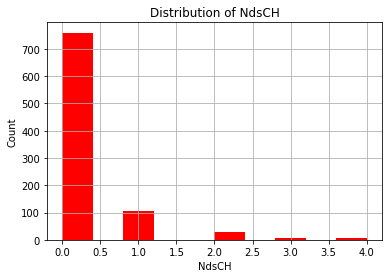

In [14]:
data.hist('NdsCH', color = 'red')
plt.xlabel('NdsCH')
plt.ylabel('Count')
plt.title('Distribution of NdsCH')
plt.show()

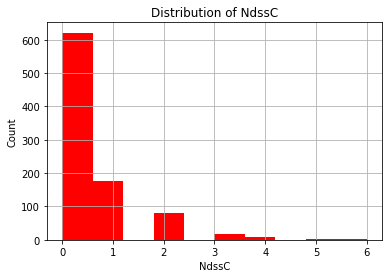

In [15]:
data.hist('NdssC', color = 'red')
plt.xlabel('NdssC')
plt.ylabel('Count')
plt.title('Distribution of NdssC')
plt.show()

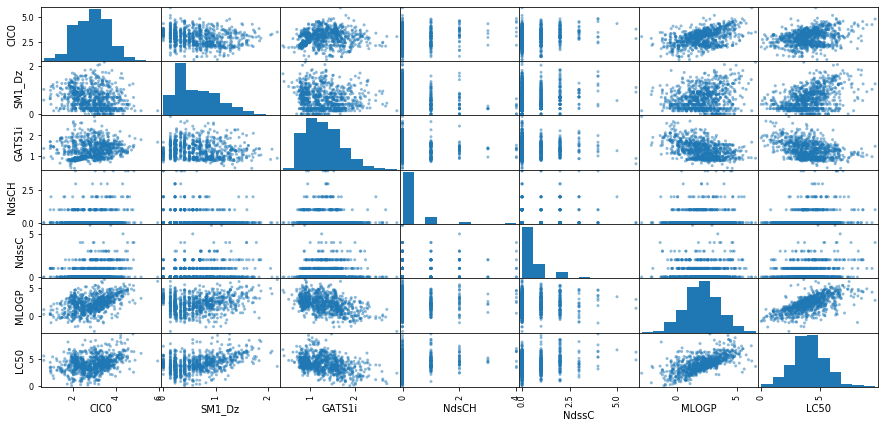

In [16]:
pd.plotting.scatter_matrix(data, figsize=(15,7))
plt.show()


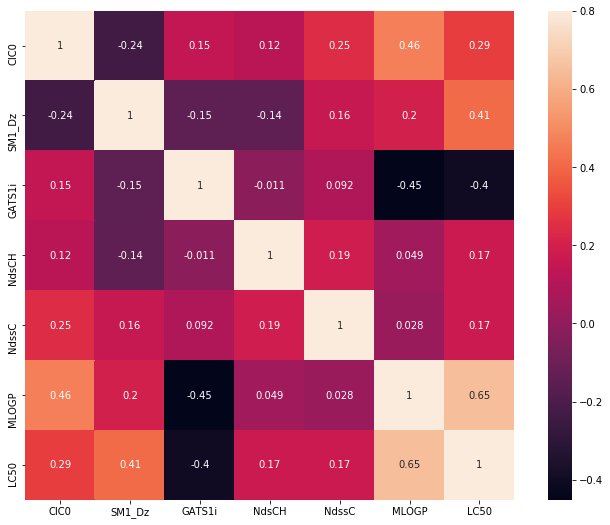

In [17]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()


As we can see from the correlation matrix, MLOGP, SM1 and GATS have most signicant correlations with the target variable.

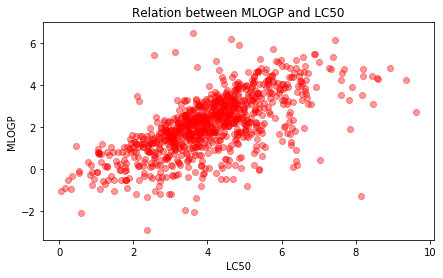

In [18]:
plt.rc('figure', figsize=(7, 4))

plt.scatter(data["LC50"], data["MLOGP"], c="red", alpha=0.4)
plt.xlabel("LC50")
plt.ylabel("MLOGP")

plt.title('Relation between MLOGP and LC50')
plt.show()

We created two splits of data, one containing the original data, the other contained standardized X data, for testing the four regression techniques: Linear Regression, Huber Regressor, Random Forest and Support Vector Regression.

In [19]:
X = data.drop(['LC50'], axis=1)
y = data['LC50']


In [20]:

ss = StandardScaler()
X_standardized = pd.DataFrame(ss.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_standardized, y, test_size=0.3, random_state=42)


Next we will test Linear regression with the original data and experiment with normalize and fit_intercept parameters.

In [21]:
L_normalized = LinearRegression(normalize = True)
L_not_normalized = LinearRegression(normalize = False)
L_fit_false = LinearRegression(fit_intercept = False)

linear_regressors = [("Normalized parameter - true", L_normalized),
                    ("Normalized parameter - false", L_not_normalized),
                    ("Fit intercept - false", L_fit_false)]


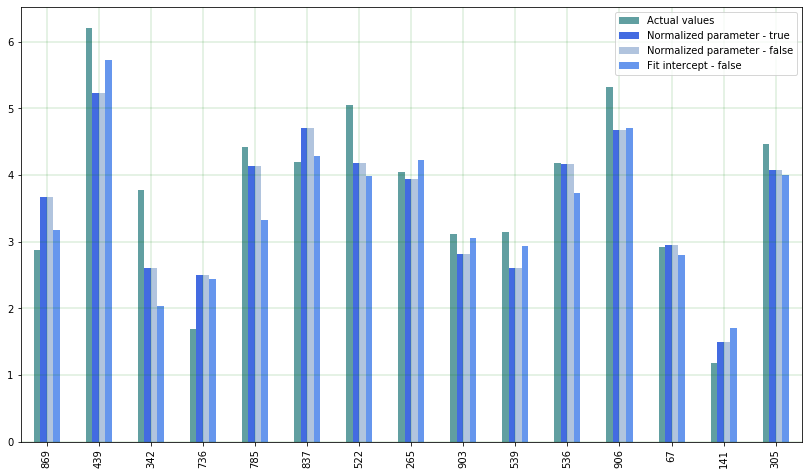

,Normalized parameter - true,Normalized parameter - false,Fit intercept - false
Coefficient of determination,0.521112,0.521112,0.430287
Mean Squared Error,0.956198,0.956198,1.137550
Root Mean Squared Error,0.977854,0.977854,1.066560
Residual sum of squares,0.956198,0.956198,1.137550
Intercept,2.097264,2.097264,0.000000


In [22]:
#plt.figure(figsize=(8, 4), facecolor='w', edgecolor='g')
predicted_vs_actual = pd.DataFrame({'Actual values': y_test}).head(15)
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares', 'Intercept'])
for key, value in linear_regressors:
    value.fit(X_train, y_train)
    y_pred = value.predict(X_test)
    results[key] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                    np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2), value.intercept_]
    predicted_vs_actual[key] = y_pred[:15]

predicted_vs_actual.plot(kind='bar',figsize=(14,8), alpha=0.99, color=[ "cadetblue", "royalblue","lightsteelblue", "cornflowerblue"])
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()
results


Two identical results was obtained when we did not use the fit_intercept parameter, both results were identical no matter the normalized parameter.

Next we will test our standardized split with SVR algorithm and different values for the parameters kernel, C and degree, with standardized data.

In [23]:
svr_rbf1 = SVR(kernel='rbf', C = 10, cache_size = 500 )
svr_rbf2 = SVR(kernel='rbf', C = 1e3, cache_size = 500 )
svr_rbf3 = SVR(kernel='rbf')

svr_lin1 = SVR(kernel='linear', C = 10, cache_size = 500)
svr_lin2 = SVR(kernel='linear', C = 1e3, cache_size = 500)
svr_lin3 = SVR(kernel='linear')

svr_poly1 = SVR(kernel='poly')
svr_poly2 = SVR(kernel='poly', degree = 5,  cache_size = 500)
svr_poly3 = SVR(kernel='poly', degree = 7,  cache_size = 500)

svr_first = [("C=10", svr_lin1, 1),
             ("C=10^3", svr_lin2, 2),
             ("C=1", svr_lin3, 3)]

svr_second =  [("Degree = 3", svr_poly1, 1),
               ("Degree = 5", svr_poly2, 2),
               ("Degree = 7", svr_poly3, 3)]

svr_third =  [("C=10", svr_rbf1, 1),
              ("C=10^3", svr_rbf2, 2),
              ("C=1", svr_rbf3, 3)]

colors = {1: "blue", 2: "red", 3: "green"}

SVR Polynomial Kernel:


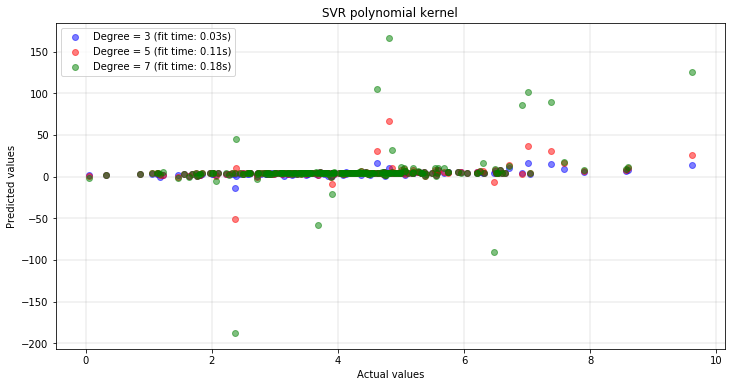

,Degree = 3,Degree = 5,Degree = 7
Coefficient of determination,-0.728203,-17.268912,-227.677453
Mean Squared Error,3.450712,36.477636,456.601522
Root Mean Squared Error,1.857609,6.039672,21.368236
Residual sum of squares,3.450712,36.477636,456.601522


In [26]:
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
print("SVR Polynomial Kernel:")
for key, value, color in svr_second:
    t0 = time.time()
    value.fit(X_train_st, y_train_st)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_st)
    results[key] = [r2_score(y_test_st, y_pred), mean_squared_error(y_test_st, y_pred), np.sqrt(mean_squared_error(y_test_st, y_pred)), np.mean((y_pred-y_test_st)**2)]
    plt.scatter(y_test_st, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("SVR polynomial kernel")
plt.ylabel("Predicted values")
plt.xlabel("Actual values")
plt.show()
results

Polynomial kernel is not a good choice for this dataset as we can see from the table above.

SVR Rbf Kernel:


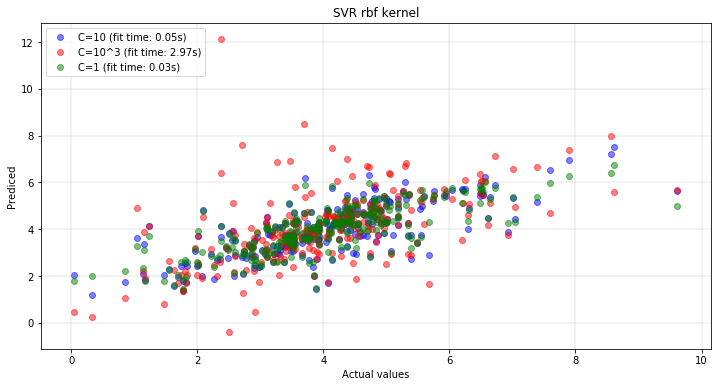

,C=10,C=10^3,C=1
Coefficient of determination,0.549864,0.065485,0.580953
Mean Squared Error,0.898789,1.865952,0.836713
Root Mean Squared Error,0.948045,1.365998,0.914720
Residual sum of squares,0.898789,1.865952,0.836713


In [25]:
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
print("SVR Rbf Kernel:")
for key, value, color in svr_third:
    t0 = time.time()
    value.fit(X_train_st, y_train_st)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_st)
    results[key] = [r2_score(y_test_st, y_pred), mean_squared_error(y_test_st, y_pred), np.sqrt(mean_squared_error(y_test_st, y_pred)), np.mean((y_pred-y_test_st)**2)]
    plt.scatter(y_test_st, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("SVR rbf kernel")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()
results

SVR with Rbf kernel showed much better results than the polynomial kernel.

SVR Linear Kernel:


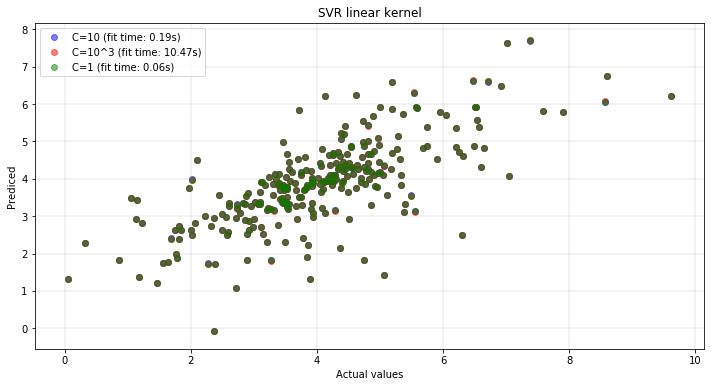

,C=10,C=10^3,C=1
Coefficient of determination,0.501371,0.501133,0.501344
Mean Squared Error,0.995615,0.996091,0.995669
Root Mean Squared Error,0.997805,0.998043,0.997832
Residual sum of squares,0.995615,0.996091,0.995669


In [27]:
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
print("SVR Linear Kernel:")
for key, value, color in svr_first:
    t0 = time.time()
    value.fit(X_train_st, y_train_st)
    elapsed_time = time.time() - t0
    y_pred = value.predict(X_test_st)
    results[key] = [r2_score(y_test_st, y_pred), mean_squared_error(y_test_st, y_pred), np.sqrt(mean_squared_error(y_test_st, y_pred)), np.mean((y_pred-y_test_st)**2)]
    plt.scatter(y_test_st, y_pred, alpha=0.5, c=colors[color], label='%s (fit time: %.2fs)' % (key, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc="upper left")
plt.title("SVR linear kernel")
plt.ylabel("Prediced")
plt.xlabel("Actual values")
plt.show()
results


SVR results with linear kernel were not bad, but the best result for this algorithm was obtained with parameters kernel = rbf, C =1.

We will test RandomForestRegressor with both out splits with different values of parameters n_estimators and max_depth.

==============================RandomForestRegressor==============================



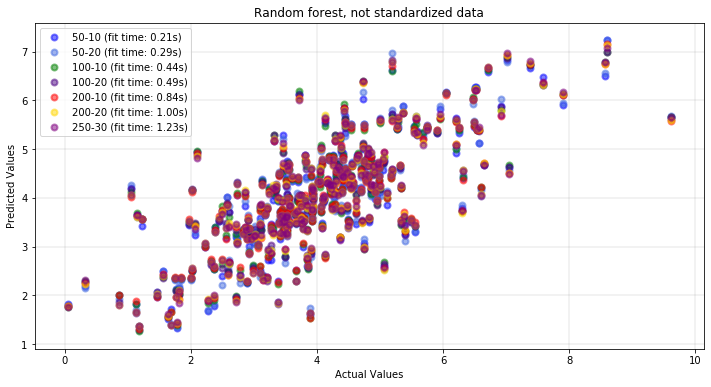

,50-10,50-20,100-10,100-20,200-10,200-20,250-30
Coefficient of determination,0.557384,0.551954,0.561918,0.555608,0.566829,0.561789,0.565132
Mean Squared Error,0.883774,0.894616,0.874721,0.887320,0.864914,0.874979,0.868303
Root Mean Squared Error,0.940093,0.945841,0.935265,0.941976,0.930008,0.935403,0.931828
Residual sum of squares,0.883774,0.894616,0.874721,0.887320,0.864914,0.874979,0.868303


In [27]:
#not standardized data
randNum = 1234
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')

print("==============================RandomForestRegressor==============================\n")
estimators = [("50-10", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=randNum)),
              ("50-20", RandomForestRegressor(n_estimators=50, max_depth=20, random_state=randNum)),
              ("100-10", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=randNum)),
              ("100-20", RandomForestRegressor(n_estimators=100, max_depth=20, random_state=randNum)),
              ("200-10", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=randNum)),
              ("200-20", RandomForestRegressor(n_estimators=200, max_depth=20, random_state=randNum)),
              ("250-30", RandomForestRegressor(n_estimators=250, max_depth=30, random_state=randNum))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'50-10': 'blue', '50-20': 'royalblue', '100-10': 'green', '100-20': 'indigo', 
          '200-10': 'red', '200-20': 'gold', '250-30': 'purple'}
lw = 2
array = []
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train, y_train)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test)
    results[name] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
    array+=[(name, mean_squared_error(y_test, y_pred))]
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Random forest, not standardized data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results

We got some similar results for this split, although the best one is with n_estimators = 200 and max_depth = 10. 

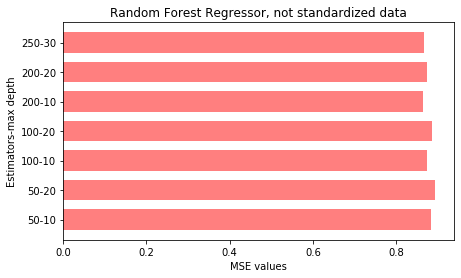

In [28]:
#figure = plt.figure(figsize=(16, 9), facecolor='w', edgecolor='g')
#mse values for estimators-max depths
fig, ax = plt.subplots()

keys = []
values = []
for key, value in array:
    keys += [key]
    values += [value]

ax.barh(keys, values, align='center', color="red", alpha=0.5, height=0.7)
ax.set_yticks(keys)
plt.xlabel("MSE values")
plt.ylabel("Estimators-max depth")
ax.set_title('Random Forest Regressor, not standardized data')

plt.show()

==============================RandomForestRegressor==============================



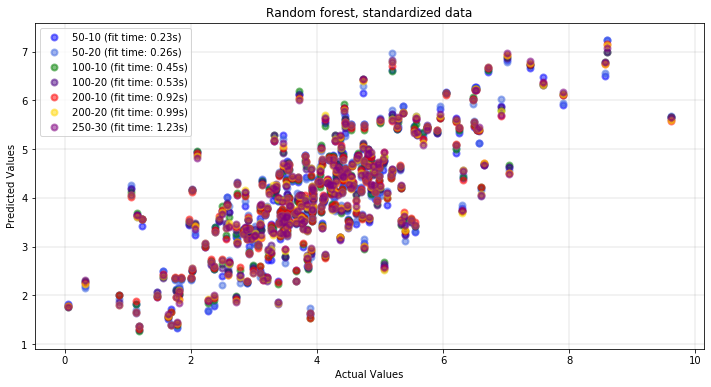

,50-10,50-20,100-10,100-20,200-10,200-20,250-30
Coefficient of determination,0.557145,0.551937,0.561814,0.555709,0.566887,0.562063,0.565335
Mean Squared Error,0.884251,0.894649,0.874929,0.887118,0.864799,0.874432,0.867898
Root Mean Squared Error,0.940346,0.945859,0.935376,0.941869,0.929946,0.935111,0.931611
Residual sum of squares,0.884251,0.894649,0.874929,0.887118,0.864799,0.874432,0.867898


In [29]:
#standardized data
randNum = 1234
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')

print("==============================RandomForestRegressor==============================\n")
estimators = [("50-10", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=randNum)),
              ("50-20", RandomForestRegressor(n_estimators=50, max_depth=20, random_state=randNum)),
              ("100-10", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=randNum)),
              ("100-20", RandomForestRegressor(n_estimators=100, max_depth=20, random_state=randNum)),
              ("200-10", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=randNum)),
              ("200-20", RandomForestRegressor(n_estimators=200, max_depth=20, random_state=randNum)),
              ("250-30", RandomForestRegressor(n_estimators=250, max_depth=30, random_state=randNum))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {'50-10': 'blue', '50-20': 'royalblue', '100-10': 'green', '100-20': 'indigo', 
          '200-10': 'red', '200-20': 'gold', '250-30': 'purple'}
lw = 2
array = []
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_st, y_train_st)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_st)
    results[name] = [r2_score(y_test_st, y_pred), mean_squared_error(y_test_st, y_pred), 
                     np.sqrt(mean_squared_error(y_test_st, y_pred)), np.mean((y_pred-y_test_st)**2)]
    plt.scatter(y_test_st, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
    array+=[(name, mean_squared_error(y_test_st, y_pred))]
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Random forest, standardized data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results


We got similar results as in the first split. The best result was again obtained when using n_estimators = 200 and max_depth = 10. This result is the best result for this algorithm in the dataset.

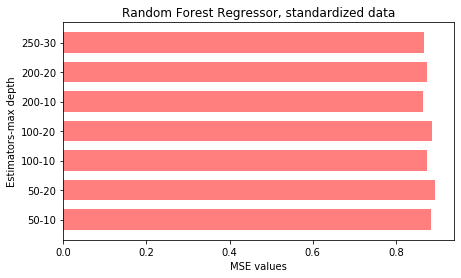

In [30]:
#figure = plt.figure(figsize=(16, 9), facecolor='w', edgecolor='g')
#mse values for estimators-max depths
fig, ax = plt.subplots()

keys = []
values = []
for key, value in array:
    keys += [key]
    values += [value]

ax.barh(keys, values, align='center', color="red", alpha=0.5, height=0.7)
ax.set_yticks(keys)
plt.xlabel("MSE values")
plt.ylabel("Estimators-max depth")
ax.set_title('Random Forest Regressor, standardized data')

plt.show()

==============================Huber Regressor==============================



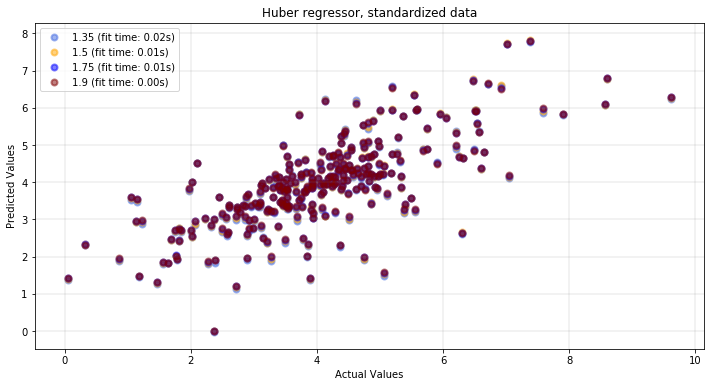

,1.35,1.5,1.75,1.9
Coefficient of determination,0.510678,0.515536,0.517341,0.518017
Mean Squared Error,0.977033,0.967332,0.963728,0.962379
Root Mean Squared Error,0.988450,0.983531,0.981696,0.981009
Residual sum of squares,0.977033,0.967332,0.963728,0.962379


In [31]:
#HuberRegressor

#standardized data
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
print("==============================Huber Regressor==============================\n")

estimators = [("1.35", HuberRegressor(epsilon = 1.35, max_iter = 4000)),
              ("1.5", HuberRegressor(epsilon = 1.5, max_iter = 4000)),
              ("1.75", HuberRegressor(epsilon = 1.75, max_iter = 4000)),
              ("1.9", HuberRegressor(epsilon = 1.9, max_iter = 4000))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {"1.35": 'royalblue',"1.5": 'orange', "1.75": 'blue', "1.9": 'maroon'}
lw = 2
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train_st, y_train_st)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test_st)
    results[name] = [r2_score(y_test_st, y_pred), mean_squared_error(y_test_st, y_pred), 
                     np.sqrt(mean_squared_error(y_test_st, y_pred)), np.mean((y_pred-y_test_st)**2)]
    plt.scatter(y_test_st, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Huber regressor, standardized data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results


The result are very similar to each other, for different values of epsilon. The best one for the standardized data split is when epsilon = 1.9.

==============================Huber Regressor==============================



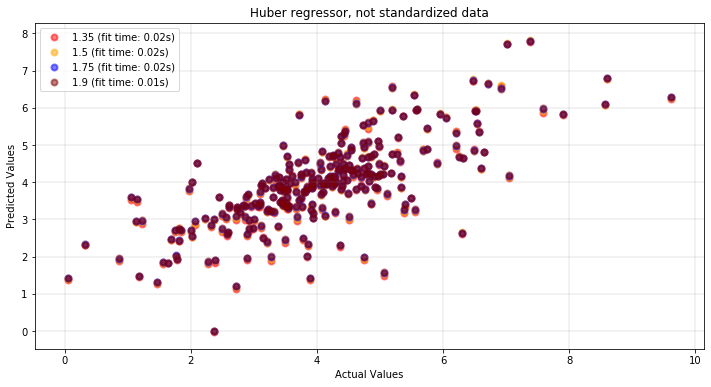

,1.35,1.5,1.75,1.9
Coefficient of determination,0.510684,0.515535,0.517341,0.518014
Mean Squared Error,0.977020,0.967335,0.963728,0.962384
Root Mean Squared Error,0.988443,0.983532,0.981697,0.981012
Residual sum of squares,0.977020,0.967335,0.963728,0.962384


In [32]:
#HuberRegressor

#not standardized data
plt.figure(figsize=(12, 6), facecolor='w', edgecolor='g')
print("==============================Huber Regressor==============================\n")

estimators = [("1.35", HuberRegressor(epsilon = 1.35, max_iter = 4000)),
              ("1.5", HuberRegressor(epsilon = 1.5, max_iter = 4000)),
              ("1.75", HuberRegressor(epsilon = 1.75, max_iter = 4000)),
              ("1.9", HuberRegressor(epsilon = 1.9, max_iter = 4000))]
results = pd.DataFrame([], ['Coefficient of determination', 'Mean Squared Error', 'Root Mean Squared Error', 'Residual sum of squares'])
colors = {"1.35": 'red',"1.5": 'orange', "1.75": 'blue', "1.9": 'maroon'}
lw = 2
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X_train, y_train)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(X_test)
    results[name] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                     np.sqrt(mean_squared_error(y_test, y_pred)), np.mean((y_pred-y_test)**2)]
    plt.scatter(y_test, y_pred, color=colors[name], linewidth=lw, alpha=0.5, label='%s (fit time: %.2fs)' % (name, elapsed_time))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.title("Huber regressor, not standardized data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
results


The result are very similar to each other and to the first split results. The best result for this data split is when epsilon = 1.9, at the same time it is the best result from the experiments with this algorithm.

In [33]:
(y_pred-y_test)**2

869    0.557554
439    0.792115
342    1.605444
736    0.597314
785    0.136632
         ...   
477    0.025772
551    6.092865
355    0.032808
468    0.886385
757    0.073945
Name: LC50, Length: 273, dtype: float64

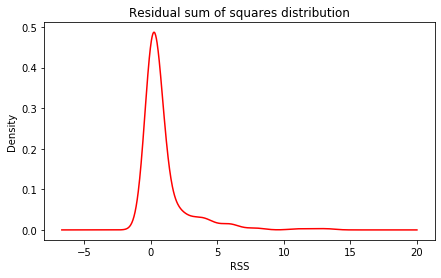

In [34]:
((y_pred-y_test)**2).plot.kde(color = 'red')
plt.xlabel('RSS')
plt.title('Residual sum of squares distribution')
plt.show()

The best result for this dataset was obtained when using SVR algorithm with kernel = rbf. 
We got the results:
 Coefficient of determination	0.580953
 Root Mean Squared Error	0.914720
